<a href="https://colab.research.google.com/github/Cann-Emma/R/blob/main/Intro_to_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REGRESSION: SIMPLE AND MULTIPLE

In [7]:
# Install Necessary Packages
install.packages('ggcorrplot')
install.packages('car')
install.packages('caret')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘pROC’, ‘recipes’




In [8]:
# Load Packages
library(dplyr)
library(ggplot2)
library(ggcorrplot)
library(car)
library(caret)

Loading required package: lattice



In [3]:
# Import DataSet
Brdwy= read.csv('BroadwayShows (3).csv')

In [9]:
# How does my DataSet look like?
glimpse(Brdwy)

Rows: 78
Columns: 5
$ Reven            <chr> "5/1/2007", "6/1/2007", "6/1/2007", "6/1/2007", "6/1/…
$ Revenue          <dbl> 18.6859, 20.4195, 20.0656, 20.4281, 19.6621, 18.5471,…
$ Paid.Attendance  <dbl> 259.181, 281.296, 271.121, 272.258, 263.937, 252.339,…
$ Number.of.Shows  <int> 36, 36, 34, 33, 31, 29, 27, 27, 28, 25, 25, 25, 22, 2…
$ Avg.Ticket.Price <dbl> 72.10, 72.59, 74.01, 75.03, 73.50, 74.50, 78.01, 79.2…


In [10]:
# What is the Correlation between variables?
cor(Brdwy$Revenue, Brdwy$Paid.Attendance)
# There is a strong positive relation between Revenue and Attendance

[1] 0.9610977

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


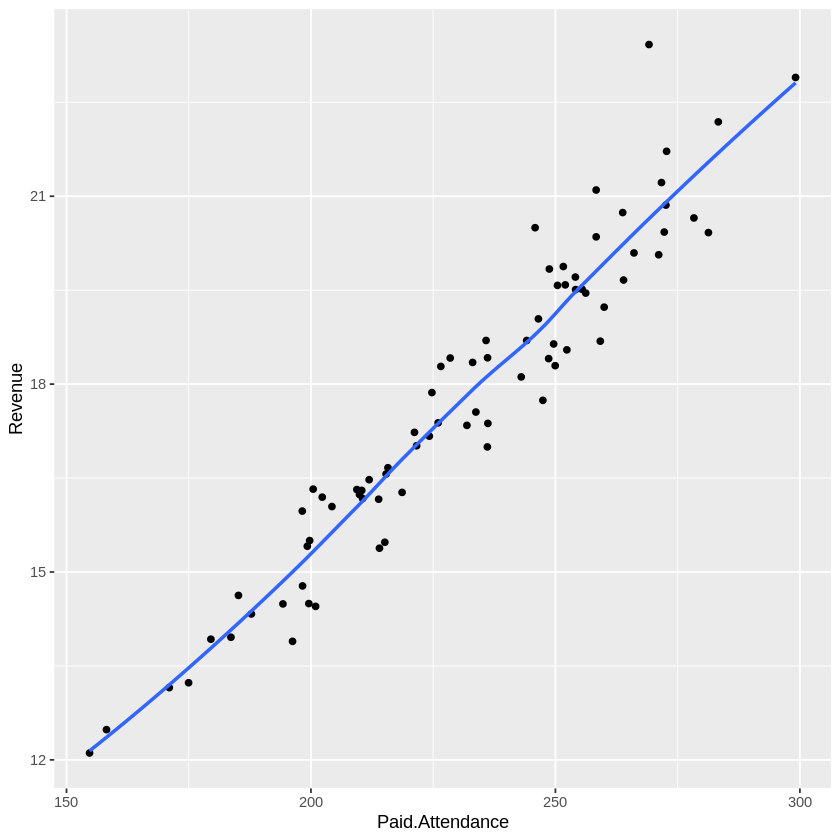

In [15]:
# How does the regression line look like>
Brdwy%>%ggplot(aes(x= Paid.Attendance, y= Revenue))+geom_point()+geom_smooth(se= F)

In [13]:
# Simple Regression Model
Brdwytrain= train(Revenue~Paid.Attendance, Brdwy, method= 'lm')
summary(Brdwytrain)

# The effect size or R2 is 0.92, meaning 92% of the variance in Revenue can be explained by Paid Attendance
# Regression Equation: Revenue= 0.053 + 0.076(Paid Attendance)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.22826 -0.48244  0.02748  0.37756  2.79352 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.05261    0.58696    0.09    0.929    
Paid.Attendance  0.07645    0.00252   30.34   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6981 on 76 degrees of freedom
Multiple R-squared:  0.9237,	Adjusted R-squared:  0.9227 
F-statistic: 920.2 on 1 and 76 DF,  p-value: < 2.2e-16


In [18]:
# Multiple Regression Model
Mod2= train(Revenue~Paid.Attendance+Number.of.Shows+Avg.Ticket.Price, Brdwy, method= 'lm')
summary(Mod2)

# Regression Equation: Revenue= -18.3 + 0.076(Paid Attendance) + 0.0070(Number of Shows) + 0.24(Average Ticket Price)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.26452 -0.03214 -0.00207  0.03789  0.31920 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -1.832e+01  3.127e-01 -58.582   <2e-16 ***
Paid.Attendance   7.596e-02  6.291e-04 120.751   <2e-16 ***
Number.of.Shows   7.028e-03  4.418e-03   1.591    0.116    
Avg.Ticket.Price  2.384e-01  3.907e-03  61.014   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09313 on 74 degrees of freedom
Multiple R-squared:  0.9987,	Adjusted R-squared:  0.9986 
F-statistic: 1.863e+04 on 3 and 74 DF,  p-value: < 2.2e-16


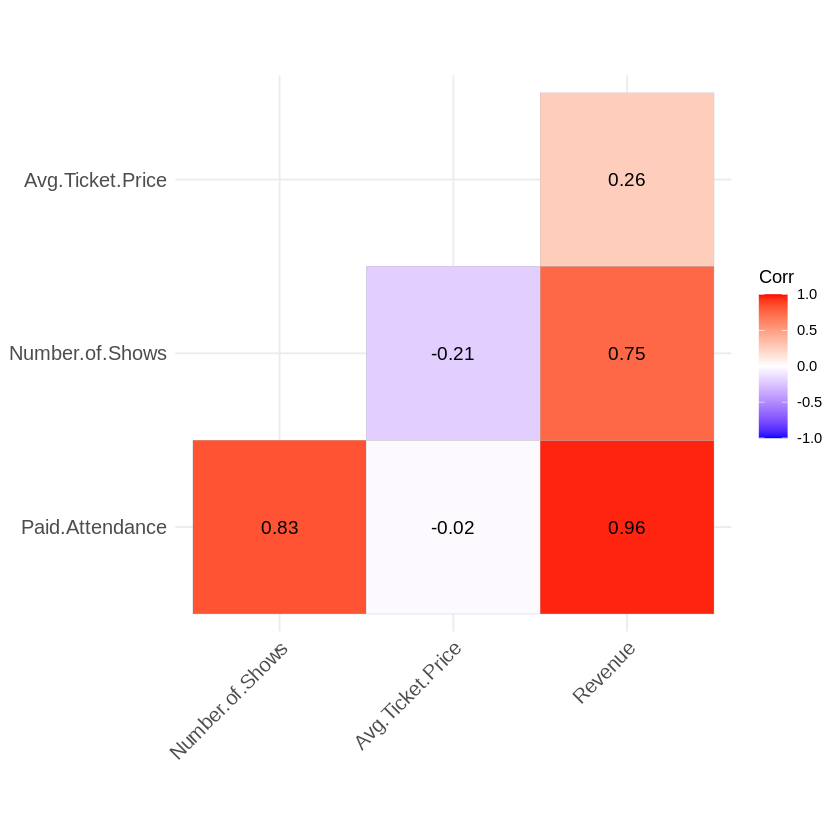

In [21]:
# Collinearity Check
Brdwy1= Brdwy%>%select(Paid.Attendance, Number.of.Shows, Avg.Ticket.Price, Revenue)
Brdwy_mtrx= cor(Brdwy1)
ggcorrplot(Brdwy_mtrx, type= 'lower', lab = T)
# Looking at the matrix below, there are no concerns for collinearity because none of the values in the grid equal 1